# TASK 2
    CUSTOMER CHURN PREDICTION

    Build a model to detect fraudulent credit card transactions. Use adataset containing information about credit card transactions, andexperiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.

In [ ]:
# IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# IMPORTING LIBRARIES FOR MODEL

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
train_dataset=pd.read_csv("fraudTrain.csv")

In [32]:
test_dataset=pd.read_csv("fraudTest.csv")

In [33]:
train_dataset.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [34]:
train_dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [35]:
train_dataset.isnull

<bound method DataFrame.isnull of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [36]:
train_dataset.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
data_con= pd.concat([train_dataset, test_dataset])
data_con.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [38]:
train_dataset.isna().sum(axis=0)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

l_e_columns = ['merchant', 'category', 'gender', 'state', 'job']
for c in l_e_columns:
    label_encoder = LabelEncoder()
    data_con[c] = label_encoder.fit_transform(data_con[c])
    label_encoders[c] = label_encoder
    
    train_dataset[c] = label_encoder.fit_transform(train_dataset[c])
    label_encoders[c] = label_encoder
    
    test_dataset[c] = label_encoder.fit_transform(test_dataset[c])
    label_encoders[c] = label_encoder

In [40]:
data_con['trans_date_trans_time'] = pd.to_datetime(data_con['trans_date_trans_time'])
data_con['dob'] = pd.to_datetime(data_con['dob'])

data_con['transaction_year'] = data_con['trans_date_trans_time'].dt.year
data_con['transaction_month'] = data_con['trans_date_trans_time'].dt.month
data_con['transaction_day'] = data_con['trans_date_trans_time'].dt.day
data_con['transaction_hour'] = data_con['trans_date_trans_time'].dt.hour

data_con['birth_year'] = data_con['dob'].dt.year
data_con['birth_month'] = data_con['dob'].dt.month
data_con['birth_day'] = data_con['dob'].dt.day
data_con.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train_dataset['trans_date_trans_time'] = pd.to_datetime(train_dataset['trans_date_trans_time'])
train_dataset['dob'] = pd.to_datetime(train_dataset['dob'])

train_dataset['transaction_year'] = train_dataset['trans_date_trans_time'].dt.year
train_dataset['transaction_month'] = train_dataset['trans_date_trans_time'].dt.month
train_dataset['transaction_day'] = train_dataset['trans_date_trans_time'].dt.day
train_dataset['transaction_hour'] = train_dataset['trans_date_trans_time'].dt.hour

train_dataset['birth_year'] = train_dataset['dob'].dt.year
train_dataset['birth_month'] = train_dataset['dob'].dt.month
train_dataset['birth_day'] = train_dataset['dob'].dt.day

train_dataset.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test_dataset['trans_date_trans_time'] = pd.to_datetime(test_dataset['trans_date_trans_time'])
test_dataset['dob'] = pd.to_datetime(test_dataset['dob'])

test_dataset['transaction_year'] = test_dataset['trans_date_trans_time'].dt.year
test_dataset['transaction_month'] = test_dataset['trans_date_trans_time'].dt.month
test_dataset['transaction_day'] = test_dataset['trans_date_trans_time'].dt.day
test_dataset['transaction_hour'] = test_dataset['trans_date_trans_time'].dt.hour
test_dataset['birth_year'] = test_dataset['dob'].dt.year
test_dataset['birth_month'] = test_dataset['dob'].dt.month
test_dataset['birth_day'] = test_dataset['dob'].dt.day

test_dataset.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [58]:
print(train_dataset.shape)
print(test_dataset.shape)
print(data_con.shape)

(1296675, 28)
(555719, 28)
(1852394, 23)


In [44]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
Unnamed: 0           1296675 non-null int64
cc_num               1296675 non-null int64
merchant             1296675 non-null int32
category             1296675 non-null int32
amt                  1296675 non-null float64
first                1296675 non-null object
last                 1296675 non-null object
gender               1296675 non-null int32
street               1296675 non-null object
city                 1296675 non-null object
state                1296675 non-null int32
zip                  1296675 non-null int64
lat                  1296675 non-null float64
long                 1296675 non-null float64
city_pop             1296675 non-null int64
job                  1296675 non-null int32
trans_num            1296675 non-null object
unix_time            1296675 non-null int64
merch_lat            1296675 non-null float64
merch_long           1296675 non-null 

In [45]:
train_dataset.describe()

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,3.428585e+02,6.227787e+00,7.035104e+01,4.525513e-01,2.667728e+01,4.880067e+04,3.853762e+01,-9.022634e+01,...,3.853734e+01,-9.022646e+01,5.788652e-03,2.019287e+03,6.142150e+00,1.558798e+01,1.280486e+01,1.973257e+03,6.526238e+00,1.566116e+01
std,3.743180e+05,1.308806e+18,2.009519e+02,3.913443e+00,1.603160e+02,4.977437e-01,1.433098e+01,2.689322e+04,5.075808e+00,1.375908e+01,...,5.109788e+00,1.377109e+01,7.586269e-02,4.522452e-01,3.417703e+00,8.829121e+00,6.817824e+00,1.737848e+01,3.397599e+00,8.887451e+00
min,0.000000e+00,6.041621e+10,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,...,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.924000e+03,1.000000e+00,1.000000e+00
25%,3.241685e+05,1.800429e+14,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,1.500000e+01,2.623700e+04,3.462050e+01,-9.679800e+01,...,3.473357e+01,-9.689728e+01,0.000000e+00,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.962000e+03,4.000000e+00,8.000000e+00
50%,6.483370e+05,3.521417e+15,3.460000e+02,6.000000e+00,4.752000e+01,0.000000e+00,2.800000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,...,3.936568e+01,-8.743839e+01,0.000000e+00,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,1.975000e+03,7.000000e+00,1.500000e+01
75%,9.725055e+05,4.642255e+15,5.140000e+02,1.000000e+01,8.314000e+01,1.000000e+00,3.800000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,...,4.195716e+01,-8.023680e+01,0.000000e+00,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,1.987000e+03,9.000000e+00,2.300000e+01
max,1.296674e+06,4.992346e+18,6.920000e+02,1.300000e+01,2.894890e+04,1.000000e+00,5.000000e+01,9.978300e+04,6.669330e+01,-6.795030e+01,...,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,2.005000e+03,1.200000e+01,3.100000e+01


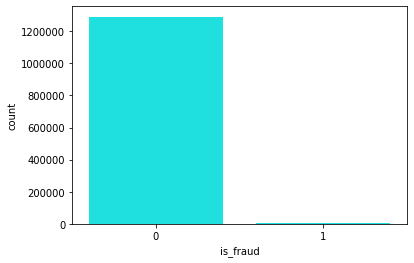

In [61]:
sns.countplot(data=train_dataset,x="is_fraud",color="cyan")

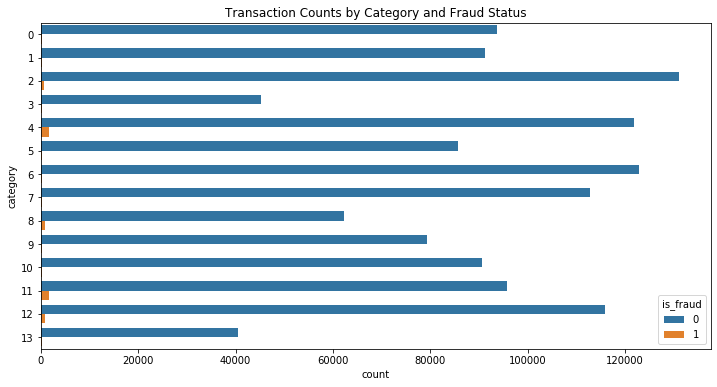

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_dataset, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

In [47]:
data_con = data_con.reset_index(drop=True)

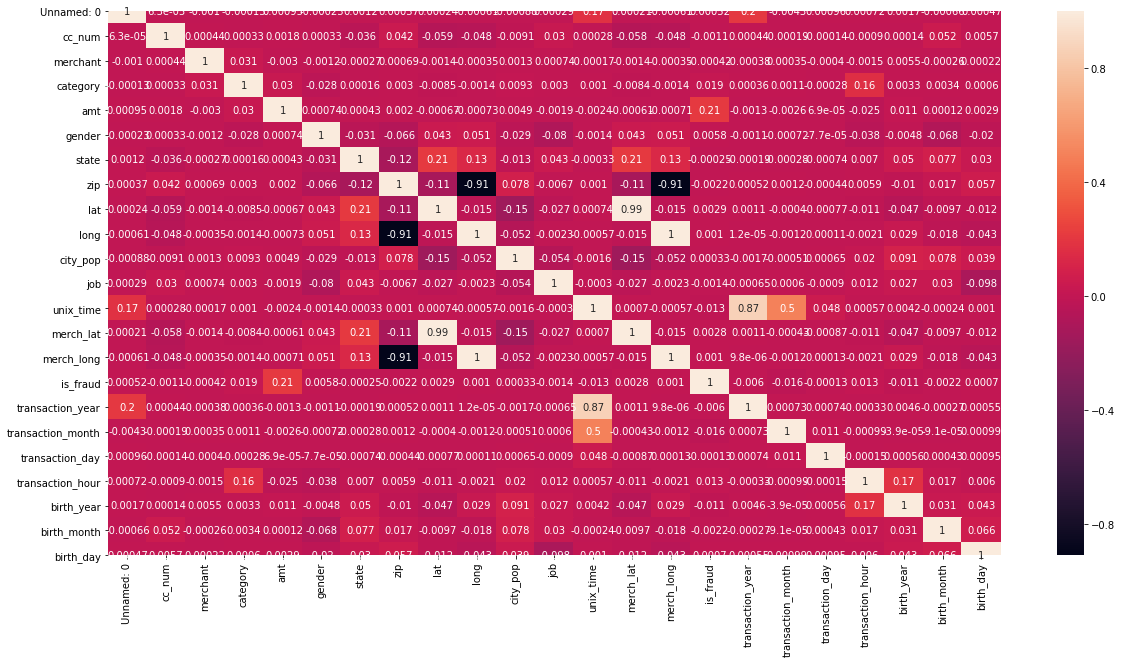

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(data_con.corr(),annot=True,color='red')

In [49]:
X = data_con.drop('is_fraud', axis=1)
y = data_con['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Training model for logisticRegression

In [50]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

F:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\New folder\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368464
           1       0.00      0.00      0.00      2015

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368464      0]
 [  2015      0]]
Accuracy: 0.9945610952307689


# Training  model for logisticRegression(Log model)

In [51]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

F:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\New folder\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368464
           1       0.00      0.00      0.00      2015

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368464      0]
 [  2015      0]]
Accuracy: 0.9945610952307689


# Training the model with DecisionTreeClassifier

In [53]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368464
           1       0.80      0.84      0.82      2015

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368044    420]
 [   322   1693]]
Accuracy: 0.9979971874249283
